In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import cv2
import PIL
import os

In [ ]:
#Importing the dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
#Display all the .jpg images available and store them in a list.
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/2414954629_3708a1a04d.jpg'),
 PosixPath('datasets/flower_photos/roses/3624546109_8eb98f0cdb.jpg'),
 PosixPath('datasets/flower_photos/roses/15922772266_1167a06620.jpg'),
 PosixPath('datasets/flower_photos/roses/12406229175_82e2ac649c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/123128873_546b8b7355_n.jpg')]

In [ ]:
#List only the daisy flowers with .jpg extension
daisy=list(data_dir.glob('daisy/*'))
daisy[:5]

[PosixPath('datasets/flower_photos/daisy/301964511_fab84ea1c1.jpg'),
 PosixPath('datasets/flower_photos/daisy/11023272144_fce94401f2_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/3326037909_b5ae370722_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/4923279674_e7f8e70794_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/14073784469_ffb12f3387_n.jpg')]

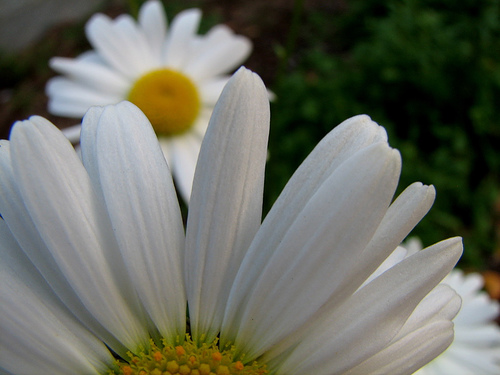

In [ ]:
#Displaying the  daisy image
PIL.Image.open(daisy[0])

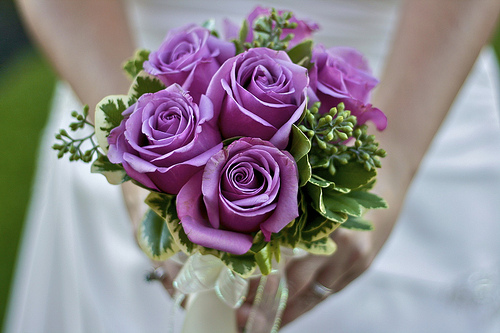

In [ ]:
#Displaying the rose image
rose=list(data_dir.glob('roses/*.jpg'))
PIL.Image.open(rose[100])

In [ ]:
#Counting the total number of images
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


**Reading Images Using OpenCV**

In [ ]:
#Creating a dictionary for storing the paths of every flowers
flowers_dict={'daisy':list(data_dir.glob('daisy/*')),
              'dandelion':list(data_dir.glob('dandelion/*')),
              'roses':list(data_dir.glob('roses/*')),
              'sunflowers':list(data_dir.glob('sunflowers/*')),
              'tulips':list(data_dir.glob('tulips/*'))}

#Creating dictionary for labels 
label_dict={'daisy':0,
            'dandelion':1,
            'roses':2,
            'sunflowers':3,
            'tulips':4}

In [ ]:
label_dict

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [ ]:
#Lets read the very first image from flowers_dict
img=cv2.imread(str(flowers_dict['daisy'][0]))
img

array([[[ 66,  73,  70],
        [ 67,  74,  71],
        [ 70,  75,  73],
        ...,
        [ 14,  38,  20],
        [ 12,  36,  18],
        [  8,  34,  18]],

       [[ 68,  75,  72],
        [ 70,  75,  73],
        [ 71,  76,  74],
        ...,
        [ 13,  41,  18],
        [  9,  36,  16],
        [  6,  32,  14]],

       [[ 69,  74,  73],
        [ 70,  75,  74],
        [ 71,  76,  74],
        ...,
        [ 12,  40,  17],
        [  7,  35,  12],
        [  3,  30,  10]],

       ...,

       [[ 91,  92,  82],
        [ 89,  92,  83],
        [ 89,  93,  87],
        ...,
        [172, 175, 166],
        [172, 175, 166],
        [171, 173, 167]],

       [[ 94,  94,  82],
        [ 89,  90,  80],
        [ 88,  92,  81],
        ...,
        [166, 167, 163],
        [167, 168, 164],
        [167, 168, 164]],

       [[ 87,  85,  77],
        [ 86,  87,  78],
        [ 87,  91,  80],
        ...,
        [157, 160, 158],
        [157, 160, 158],
        [160, 161, 159]]

In [ ]:
img.shape

(375, 500, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
#Similarly lets resize every images
X,y=[],[]
for image_name,image_path in flowers_dict.items():
  for image in image_path:
    img=cv2.imread(str(image))
    resized_image=cv2.resize(img,(180,180))
    X.append(resized_image)
    y.append(label_dict[image_name])

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [ ]:
#Scaling 
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
#Convolution Neural Network

#%%timeit -n1 -r1
cnn=Sequential([
                layers.Conv2D(16,(3,3),padding='same',activation='relu'),
                layers.MaxPool2D((2,2)),
                layers.Conv2D(32,3,padding='same',activation='relu'),
                layers.MaxPool2D((2,2)),
                layers.Conv2D(64,3,padding='same',activation='relu'),
                layers.MaxPool2D((2,2)),
                layers.Flatten(),
                layers.Dense(128,activation='relu'),
                layers.Dense(5,activation='softmax')])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

cnn.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
81/81 [==============================] - 70s 853ms/step - loss: 1.4955 - accuracy: 0.3706
Epoch 2/10
81/81 [==============================] - 69s 853ms/step - loss: 0.9855 - accuracy: 0.6265
Epoch 3/10
81/81 [==============================] - 69s 855ms/step - loss: 0.7819 - accuracy: 0.7039
Epoch 4/10
81/81 [==============================] - 70s 858ms/step - loss: 0.5559 - accuracy: 0.8097
Epoch 5/10
81/81 [==============================] - 70s 858ms/step - loss: 0.3625 - accuracy: 0.8811
Epoch 6/10
81/81 [==============================] - 69s 857ms/step - loss: 0.2495 - accuracy: 0.9187
Epoch 7/10
81/81 [==============================] - 70s 859ms/step - loss: 0.1347 - accuracy: 0.9675
Epoch 8/10
81/81 [==============================] - 70s 860ms/step - loss: 0.0733 - accuracy: 0.9809
Epoch 9/10
81/81 [==============================] - 70s 861ms/step - loss: 0.0391 - accuracy: 0.9888
Epoch 10/10
81/81 [==============================] - 69s 857ms/step - loss: 0.0835 - accura

In [ ]:
cnn.evaluate(X_test_scaled,y_test)

35/35 [==============================] - 9s 256ms/step - loss: 2.2328 - accuracy: 0.6176


[2.232753276824951, 0.6176203489303589]

*Since, the training accuracy is very high(97.62%) but the testing accuracy is comparatively very low(61.76%). This is a clear case of overfitting.So, to improvise the testing accuracy, we attempt to perform data augmentation.*

In [ ]:
#Data Augmentation
augmentor=Sequential([
                      layers.experimental.preprocessing.RandomFlip(mode='horizontal'),
                      layers.experimental.preprocessing.RandomRotation(0.2),
                      layers.experimental.preprocessing.RandomZoom(0.1)
                      ])

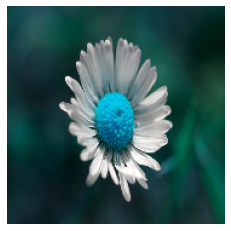

In [ ]:
#Original Image
plt.axis('off')
plt.imshow(X[200])

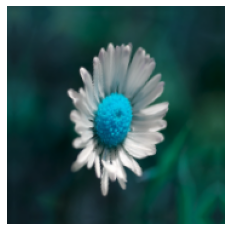

In [ ]:
#Augmented Image
plt.axis('off')
plt.imshow(augmentor(X)[200])

In [ ]:
#Training the model once again  with augmented data.
cnn=Sequential([augmentor,
                layers.Conv2D(16,(3,3),padding='same',activation='relu'),
                layers.MaxPool2D((2,2)),
                layers.Conv2D(32,3,padding='same',activation='relu'),
                layers.MaxPool2D((2,2)),
                layers.Conv2D(64,3,padding='same',activation='relu'),
                layers.MaxPool2D((2,2)),
                layers.Dropout(0.25),
                layers.Flatten(),
                layers.Dense(128,activation='relu'),
                layers.Dense(5,activation='softmax')])

cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

cnn.fit(X_train_scaled,y_train,epochs=10)

Epoch 1/10
81/81 [==============================] - 80s 976ms/step - loss: 1.7266 - accuracy: 0.3079
Epoch 2/10
81/81 [==============================] - 79s 974ms/step - loss: 1.2055 - accuracy: 0.4879
Epoch 3/10
81/81 [==============================] - 79s 979ms/step - loss: 1.0160 - accuracy: 0.5897
Epoch 4/10
81/81 [==============================] - 79s 977ms/step - loss: 0.9950 - accuracy: 0.5994
Epoch 5/10
81/81 [==============================] - 79s 979ms/step - loss: 0.9369 - accuracy: 0.6412
Epoch 6/10
81/81 [==============================] - 79s 975ms/step - loss: 0.8442 - accuracy: 0.6710
Epoch 7/10
81/81 [==============================] - 79s 980ms/step - loss: 0.8615 - accuracy: 0.6574
Epoch 8/10
81/81 [==============================] - 79s 977ms/step - loss: 0.8480 - accuracy: 0.6700
Epoch 9/10
81/81 [==============================] - 79s 975ms/step - loss: 0.7665 - accuracy: 0.7048
Epoch 10/10
81/81 [==============================] - 79s 981ms/step - loss: 0.7290 - accura

In [ ]:
cnn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 22, 22, 64)       

In [ ]:
#Checking the models performance on augmented test data.
cnn.evaluate(X_test_scaled,y_test)

35/35 [==============================] - 9s 247ms/step - loss: 0.9517 - accuracy: 0.6358


[0.951718270778656, 0.6357856392860413]

*Here,we can see that after augmentation, the overfitted train accuracy lowered down to 71.12% and the test accuracy lowered down to 63.58%. Though, the accuracies have lowered but the overfitting have been minimized to a great extent.*